# La régression linéaire from scratch

Comme vous le savez, je pense intimement que la meilleure façon de bien comprendre un algorithme est de le recoder from scratch. 

Dans ce notebook, on va coder from scratch l'algorithme de la régression linéaire.

# Importation des packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1ghsB3WdBlyLRzvfede0KWDqf9P16KyHl?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
multivariate_regression = np.genfromtxt('/content/drive/MyDrive/Turnover_prediction/multivariate_regression.txt', delimiter=',')

# Préparation des données

## Séparation des données explicatives et de la variable cible

In [5]:
# We construct the X dataset 
x = multivariate_regression[:, :2]

# We construct the Y dataset
y = multivariate_regression[:, 2].reshape(-1, 1)

## Visualisation des données

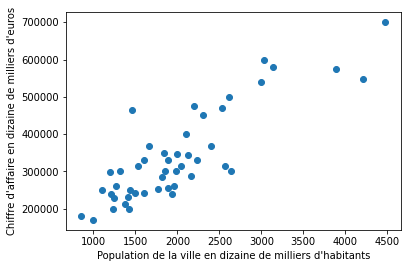

In [6]:
plt.scatter(x[:, 0], y)
plt.xlabel('Population de la ville en dizaine de milliers d\'habitants')
plt.ylabel('Chiffre d\'affaire en dizaine de milliers d\'euros')

plt.show()

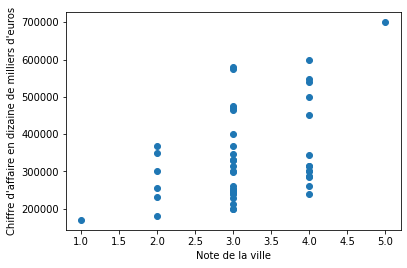

In [7]:
plt.scatter(x[:, 1], y)
plt.xlabel('Note de la ville')
plt.ylabel('Chiffre d\'affaire en dizaine de milliers d\'euros')

plt.show()

## Standardisation des données

In [8]:
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_norm = (x - x_mean) / x_std

# Implémentation de la classe *linear_regression*

## Initialisation de la classe

Dans cette classe on va initialiser les poids nécessaires à la prédiction de notre modèle.

In [10]:
class linear_regression():
  def __init__(self, x, seed=123):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

Test de la classe

In [12]:
lin_reg = linear_regression(x)
print(lin_reg._w.shape)
lin_reg._w

(3, 1)


array([[0.69646919],
       [0.28613933],
       [0.22685145]])

## Implémentation de la classe *predict*

L'objectif de cette partie est d'implémenter une fonction *predict* qui prendra en entrée un jeu de données afin d'effectuer une prediction pour chacun des exemples. 

Pour effectuer la prédiction la fonction *predict* utilise la formule suivante : 

$$pred(X) = X.W = \hat y$$

In [13]:
class linear_regression():
  def __init__(self, x, seed=None):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)

In [14]:
lin_reg = linear_regression(x)
print(lin_reg.predict(x).shape)
lin_reg.predict(x_norm)

(47, 1)


array([[ 2.01924584e-01],
       [ 3.39122278e-02],
       [ 3.00598507e-01],
       [-2.63041893e-01],
       [ 7.36229493e-01],
       [ 3.97871276e-01],
       [ 1.19106097e-02],
       [-2.37586802e-02],
       [-3.94264991e-02],
       [-1.42370428e-03],
       [ 3.82870173e-01],
       [ 1.67255368e-01],
       [ 1.30586004e-01],
       [ 1.46454867e+00],
       [-7.67625783e-02],
       [ 5.02878999e-01],
       [-2.95044246e-01],
       [-8.74300295e-02],
       [ 6.05886574e-01],
       [ 7.46563587e-01],
       [ 8.95829886e-02],
       [-1.05696988e-01],
       [ 3.52456592e-02],
       [ 3.90204045e-01],
       [ 7.97301703e-01],
       [-1.32766697e-01],
       [-1.34245869e-02],
       [ 3.42601596e-01],
       [ 2.33926937e-01],
       [ 3.79604318e-01],
       [-1.22031522e-01],
       [-6.37335034e-01],
       [ 4.16205958e-01],
       [ 5.46283242e-01],
       [ 3.39867010e-01],
       [-2.04251017e-02],
       [-8.64299559e-02],
       [ 4.46874880e-01],
       [ 1.1

# Implémentation de la fonction *compute_cost*

Dans cette fonction, nous allons implémenter la fonction de coût de notre fonction pour estimer l'erreur de prédiction de notre modèle.

Pour cela, nous allons utiliser l'erreur moyenne au carré ou MSE.

Expression matématique :
$$ J(W)=\frac{1}{2m} \sum_{i=1}^{m} (\hat y^{(i)} -y^{(i)})^2$$
Expression vectorielle :
$$ J(W)=\frac{1}{2m} (\hat Y-Y)^T(\hat Y-Y)$$

In [15]:
class linear_regression():
  def __init__(self, x, seed=None):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)

  def compute_cost(self, y, y_hat):
    m, _ = y.shape
    return 1/(2*m) * np.dot((y-y_hat).T, (y-y_hat))

In [16]:
lin_reg = linear_regression(x)
y_pred = lin_reg.predict(x)
lin_reg.compute_cost(y, y_pred)

array([[6.50891479e+10]])

# Implémentation de la fonction *fit*

Dans cette fonction, nous allons implémenter la fonction du gradient descent. 

L'objectif est de trouver les valeurs des paramètres qui minimisent le plus la fonction de coût implémentée précédemment. 

Expression mathématique :
$$ w_j := w_j  - \alpha \frac{1}{m} \sum_{i=1}^{m} (\hat y^{(i)}-y^{(i)})x_j^{(i)}$$

Expression vectorielle :
$$ W := W - \frac{\alpha}{m}X^T (\hat Y-Y) $$

In [17]:
class linear_regression():
  def __init__(self, x, seed=None):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)

  def compute_cost(self, y, y_hat):

    m, _ = y.shape

    return 1/(2*m) * np.dot((y-y_hat).T, (y-y_hat))

  def fit(self, x, y, learning_rate=0.001, num_iters=200):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    J_history = np.zeros(num_iters)
    
    for i in range(0, num_iters):

      self._w = self._w - (learning_rate/m) * np.dot(x_1.T, (self.predict(x)-y))
      
      J_history[i] = self.compute_cost(self.predict(x), y)
      
    return J_history

In [18]:
lin_reg = linear_regression(x_norm)
history = lin_reg.fit(x_norm, y, learning_rate=0.01, num_iters=300)

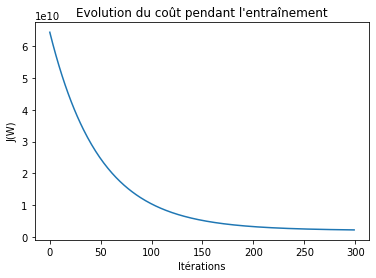

In [19]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

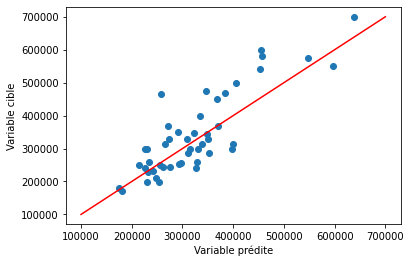

In [20]:
plt.scatter(lin_reg.predict(x_norm), y)
plt.plot(np.arange(100000, 700000), np.arange(100000, 700000), color='red')
plt.ylabel('Variable cible')
plt.xlabel('Variable prédite')
plt.show()

# Influence du learning rate 

In [21]:
iterations=2500
learning_rate = [0.1, 0.01, 0.001]
J_history = np.zeros((iterations, len(learning_rate)))

for i in range(0, len(learning_rate)) :
  lin_reg = linear_regression(x_norm)
  J_history[:, i] = lin_reg.fit(x_norm, y, learning_rate[i], num_iters=iterations)

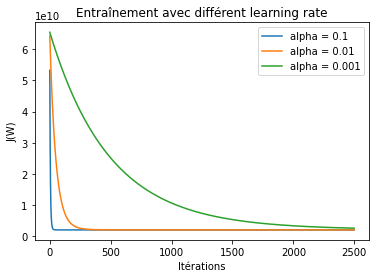

In [22]:
fig, ax = plt.subplots()

plt.plot(J_history[:, 0], label="alpha = 0.1")
plt.plot(J_history[:, 1], label="alpha = 0.01")
plt.plot(J_history[:, 2], label="alpha = 0.001")

plt.title('Entraînement avec différent learning rate')
plt.xlabel("Itérations")
plt.ylabel("J(W)")
ax.legend(loc='upper right')
plt.show()